# Geometric Brownian motion: The benchmark

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm

## Background

Geometric Brownian motion (GBM) is a continuous-time stochastic process whose log is a simple Brownian process. GBM is defined through
\begin{equation}
\frac{dS}{S} = \mu dt + \sigma dW
\end{equation}
where $S$ is the spot price, $\mu$ is the (constant) drift, $\sigma$ is the (constant) instantaneous volatility and $W$ is a Wiener process. It is widely used to model stock prices because of the following properties:  
1. Expected returns is independent of the spot price of the stock  
2. Unlike arithmetic Brownian motion, the price is strictly positive
3. The math is not too hard to handle :)

The solution of GBM can be discretized as
\begin{equation}
S_t = S_{t-\Delta t}\text{exp}\left[\left(\mu-\frac{1}{2}\sigma^2\right)\Delta t+\sigma\sqrt{\Delta t}z_t\right]
\end{equation}
where $S_t$ is the spot price at time $t$, $\Delta t$ is the discretization time step and $z_t$ is a random number drawn from a unit normal distribution.

## Simulation

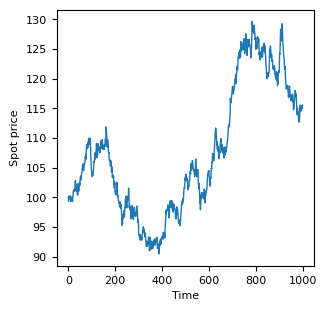

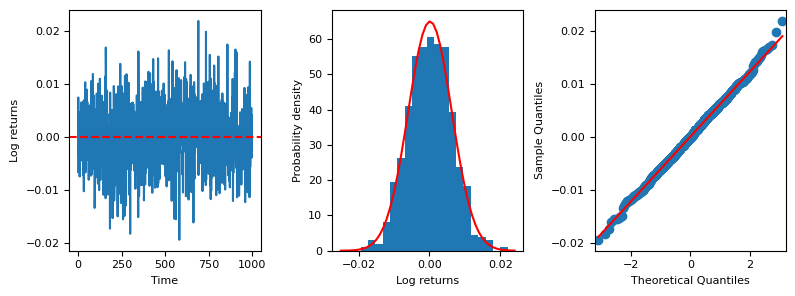

In [68]:
# --- Simulate sample GBM path ---
dt = 0.001 # time step
mu = 0.05 # drift
sigma = 0.2 # volatility
S0 = 100 # initial spot price
ttot = 1000 # number of integration steps
S = np.zeros(ttot) # spot price

S[0] = S0
rand = np.random.standard_normal(size=(ttot-1))
for i in range(1,ttot):
    S[i] = S[i-1] * np.exp((mu - sigma**2/2) * dt + sigma * np.sqrt(dt) * rand[i-1])

plt.plot(range(ttot), S, lw=1)
plt.xlabel('Time')
plt.ylabel('Spot price')

# --- Plot distribution of log returns ---
returns = np.log(S[1:] / S[:-1])

fig, axs = plt.subplots(figsize=(8,3),ncols=3)
axs[0].plot(range(len(returns)), returns)
axs[0].axhline(color='r',linestyle='--')
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Log returns')

axs[1].hist(returns, bins=20, density=1)
xs = np.arange(-0.025,0.025,0.001)
axs[1].plot(xs, scipy.stats.norm.pdf(xs,np.mean(returns),np.std(returns)), 'r')
axs[1].set_xlabel('Log returns')
axs[1].set_ylabel('Probability density')

sm.qqplot(returns, ax=axs[2], line='s')
plt.tight_layout()